# Bhaskar Kumar Das

## Loading all the necessary libraries used in this task


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score,classification_report

## loading and displaying the dataset

In [4]:
data=pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Note: Id  is a useless feature here so drop it

In [20]:
data=data.drop('Id',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# lets analyze our dataset

In [21]:
data.shape # dimension of our data contains 150 rows and 5 cols

(150, 5)

In [22]:
data.columns.values #printing the column names of our dataset

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'], dtype=object)

In [104]:
data.dtypes #printing the domain data type of all the features of our dataset 

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [23]:
data['Species'].unique() # Check all the unique classes of our target vector

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
data['Species'].value_counts() # checking the no of samples/each class

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## Note: all the classes contains data of equal proportions so no problem of data being imbalanced.

In [25]:
data.isnull().sum() # checking whether my class contains any missing values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## My dataset has no mising values in it so lets proceed

In [26]:
data.describe() # displaying the descriptive statistics of my dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Observation 1: sepallength,seplawidth,petallength,petalwidth have their mean of 5.84,3.05,3.75,1.19 respectively and std- deviation and percentiles with min and max values are also shown for their respective features 

# Exloratory Data Analysis (EDA)

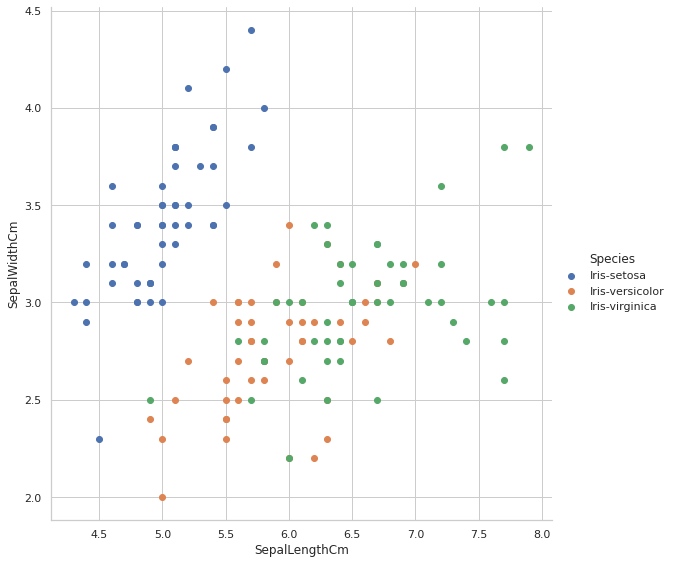

In [30]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='Species',size=8).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

# Observation 2: scatterplot of sepallength vs sepalwidth can easily distinguish class setosa from the rest but is not great for distinguishing the other two classes i.e virginica & versicolor

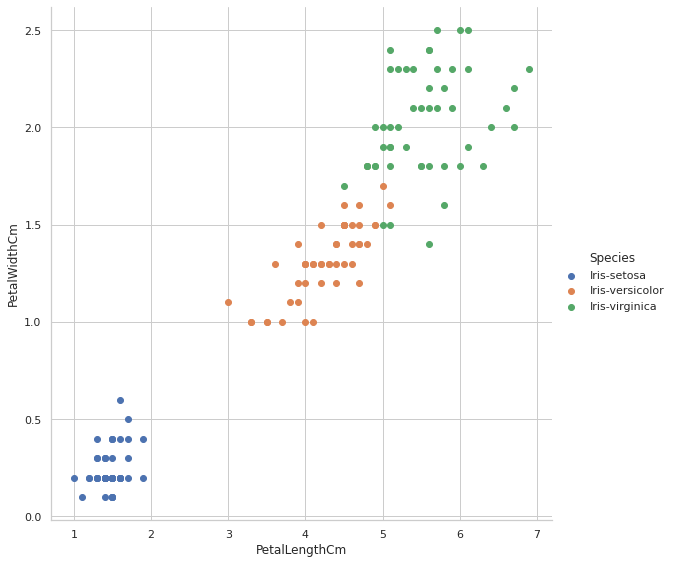

In [31]:
sns.set_style('whitegrid')
sns.FacetGrid(data,hue='Species',size=8).map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()

# Observation 3: scatterplot of petallength vs petalwidth is great for separating all the three classes.

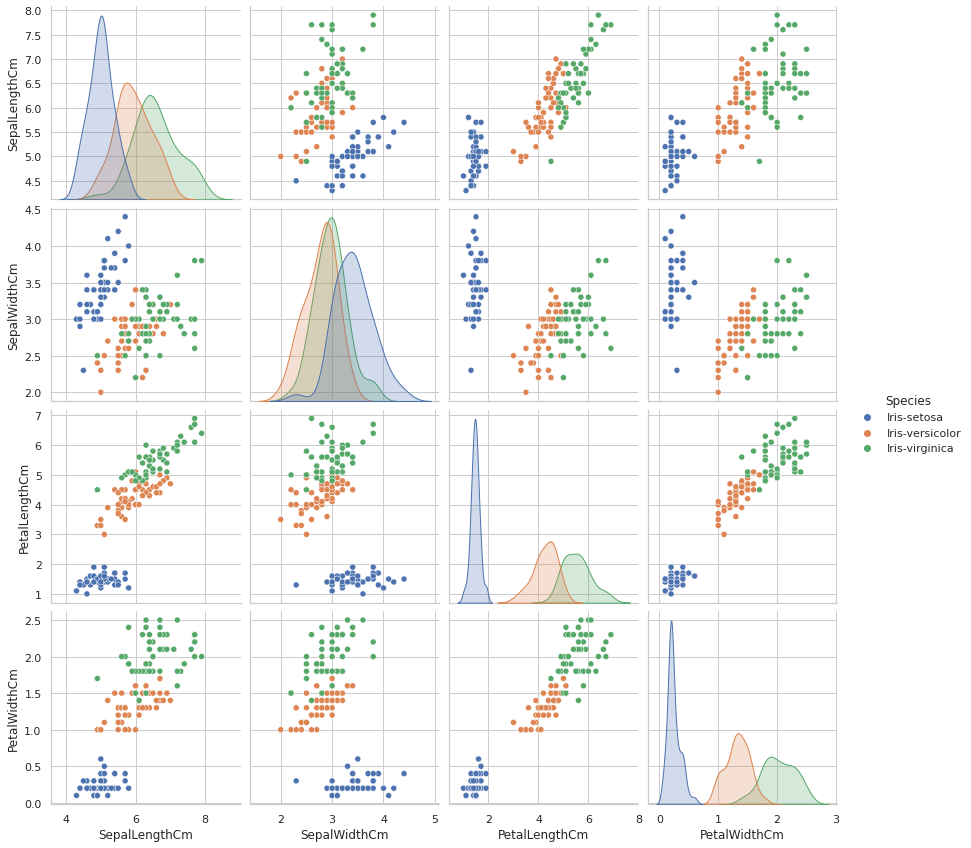

In [32]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(data,hue='Species',size=3)
plt.show()


# Observation 4: our pairplot also confirms that just look at the plot between petallength vs petalwidth and compare them with the rest, we can clearly see the difference of how good it is.

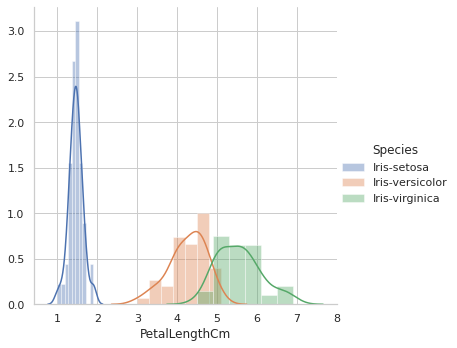

In [36]:
sns.FacetGrid(data,hue='Species',size=5).map(sns.distplot,'PetalLengthCm').add_legend()

# observation 5: setosa has a very different petallength distribution from the rest and although versicolor,verginica have slight overlap but they are also have more and less different distribution

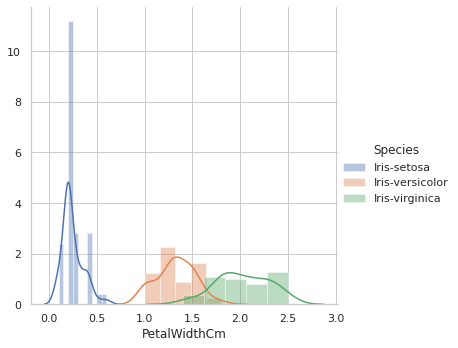

In [37]:
sns.FacetGrid(data,hue='Species',size=5).map(sns.distplot,'PetalWidthCm').add_legend()

# Observation6: almost same as observation 5 with slight overlap between versicolor and virginica 

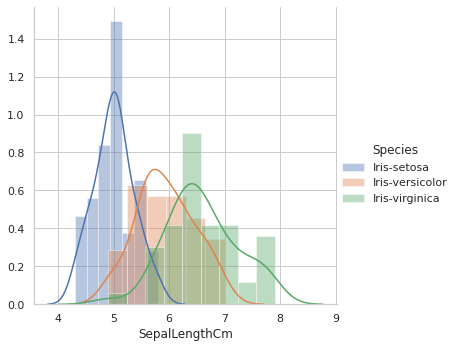

In [38]:
sns.FacetGrid(data,hue='Species',size=5).map(sns.distplot,'SepalLengthCm').add_legend()

# Observation 7: for sepallength distribution all of the three have a huge overlap and it is difficult to distinguish their dustribution. 

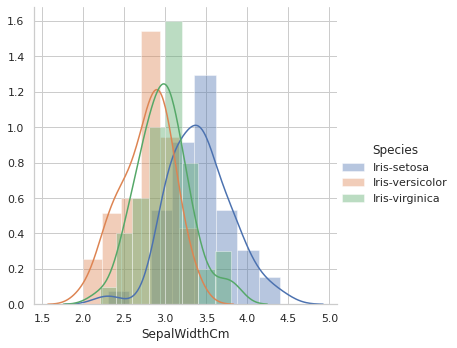

In [39]:
sns.FacetGrid(data,hue='Species',size=5).map(sns.distplot,'SepalWidthCm').add_legend()

# Observation 8:same as Observation 7

# Preparing our datset for training with Decision Tree

In [47]:
x=data.iloc[:,:-1].values # sepallength,sepalwidth,petallength,petalwidth forms the feature matrix 
y=data.iloc[:,-1:].values # species forms the target vector

# splitting into train set and test set

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Lets train our model with Decision Tree

In [71]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Evaluating on train set

In [75]:
print(f'score of our model on training set {clf.score(x_train,y_train)}')

score of our model on training set 1.0


# Evaluating on Test set using  metrics called accuracy score



In [72]:
y_pred=clf.predict(x_test)
accDT=accuracy_score(y_test,y_pred)
print(f'accuracy of our DT on unseen data is {accDT}')

accuracy of our DT on unseen data is 1.0


# Observation 9: our model has performed with 100% accuracy on test set...this is really good 

# Note: depth of tree is the hyperparameter if we change it then performance of Tree will also change by chance we got 100% accurate by training with Decision Tree's default depth but what if we get a poor result, in that case we have to find the right depth of our Dtree 

# Finding the right depth

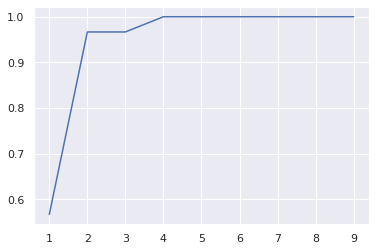

In [70]:
max_depth_range = list(range(1, 10))

accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    accuracy.append(score)
plt.plot(max_depth_range,accuracy)    

# Observation 10: at depth of 3 we'll get an accuracy of greater than 95% and with 4 accuracy shots up to 100%.so 4 can be said to be right depth but we shouldn't increase too much because Decision Tree is notorious for overfitting and it will surely overfit with a lot more complicated dataset. 

# lets visualize our Tree


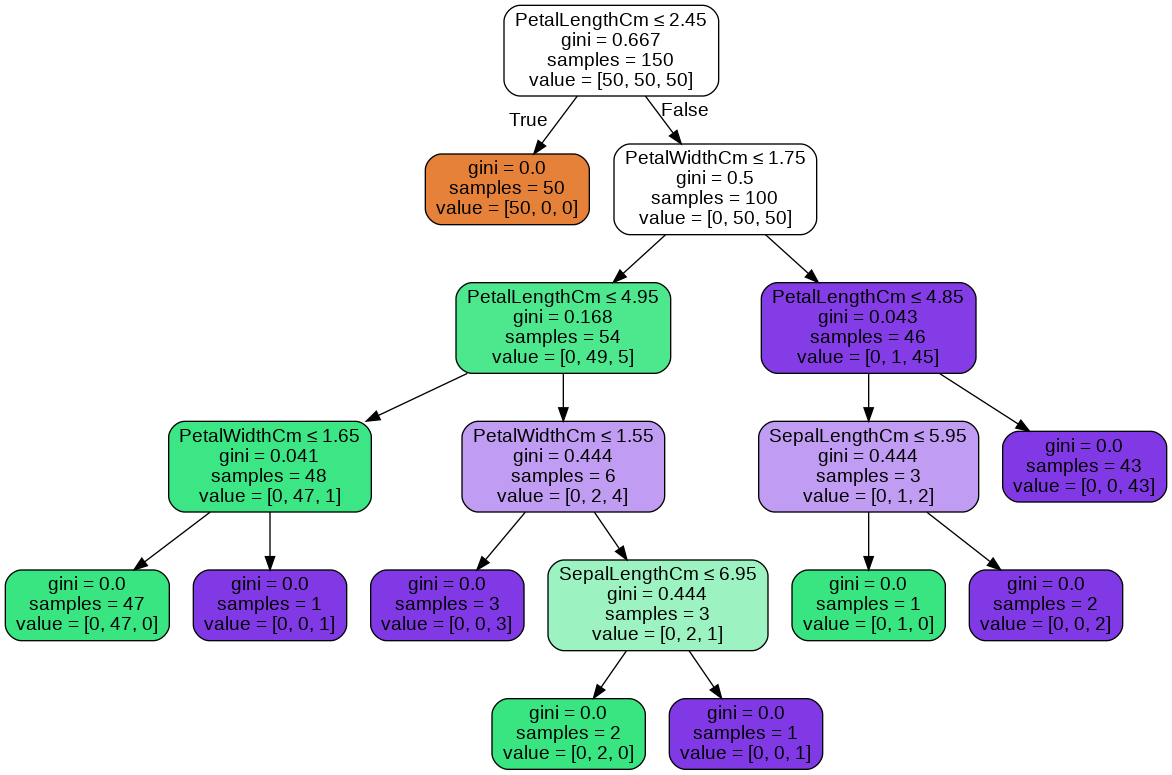

In [102]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

fn=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
#cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
my_DT = DecisionTreeClassifier().fit(x, y)

dot_data = StringIO()
export_graphviz(my_DT, out_file=dot_data, feature_names=fn,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Conclusion: Dt always tris to minimize entropy/gini_impurity (here it mimizes gini only) and thus maximizing the information gain  so that at leaf node it should have as much low gini as possible.We can see that starting with a gini value of 0.667 at root,its gini becomes 0 at the leaf node.So we can say that our DTree has performed very well on Iris and it has also acheived an accuracy of 100%. so we can claim success :)